# MNIST Fashion 0.2

**Changes:**
  - All real examples shown within an epoch will now be unique (rather than each batch being randomly sampled from the dataset). The order of these examples is still randomised from epoch-to-epoch.

In [1]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session
from tensorflow.keras.datasets import fashion_mnist

import pickle

In [2]:
(real_train, _), _ = fashion_mnist.load_data()
real_train = (np.expand_dims(real_train, axis=-1)/127.5 - 1.).astype("float32")
real_train.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

In [6]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [7]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, verbose=True, lr=(1e-4, 2e-4))

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         51

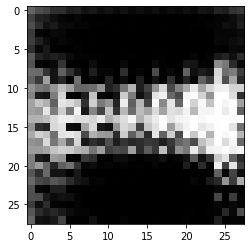

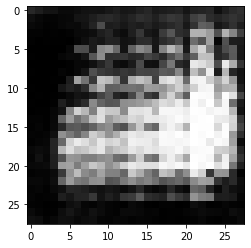

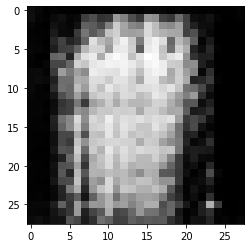

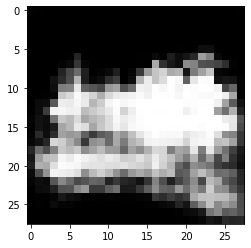

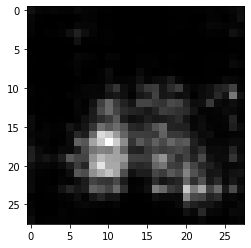

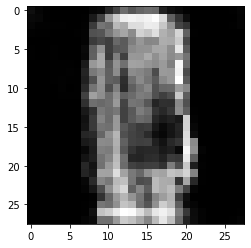

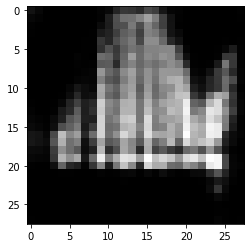

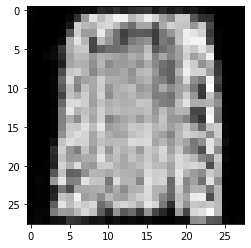

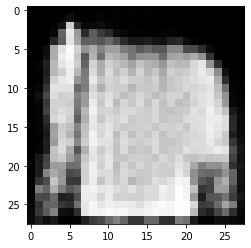

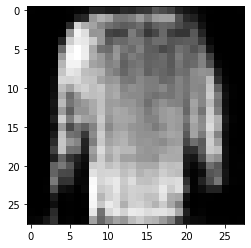

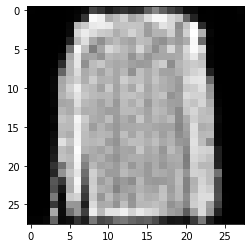

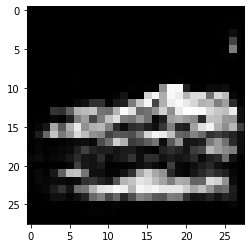

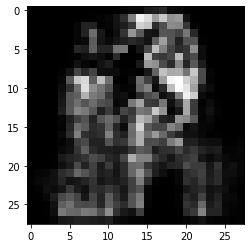

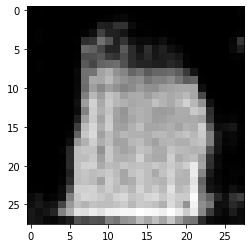

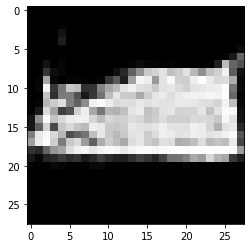

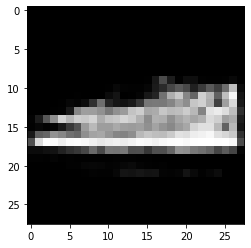

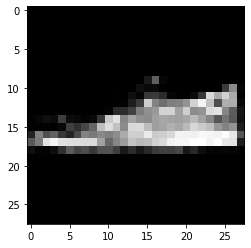

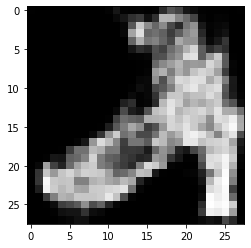

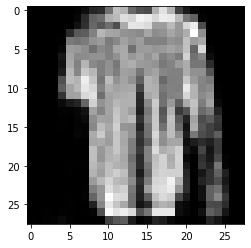

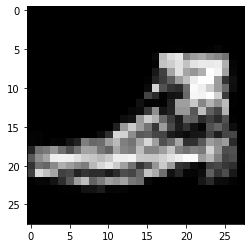

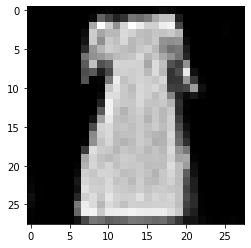

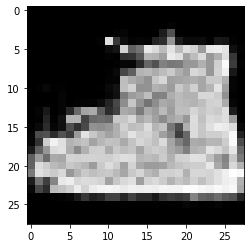

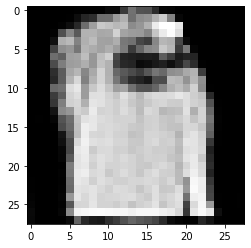

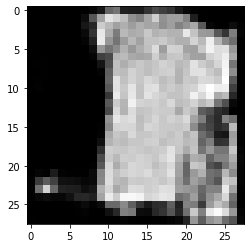

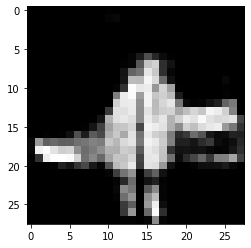

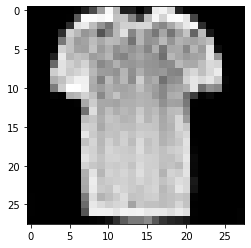

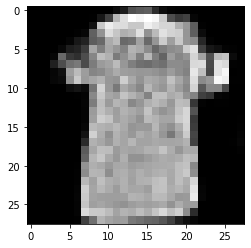

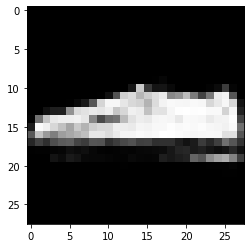

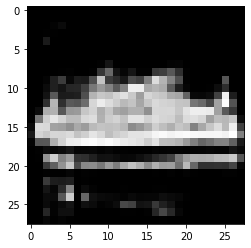

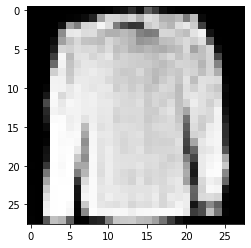

In [8]:
model.train(real_train, num_epochs=30, batch_size=60, labels=(0, 0.9), cmap="gray")

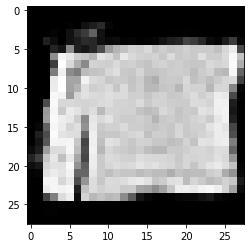

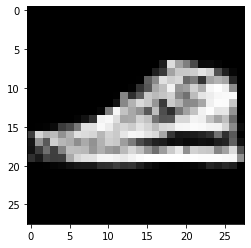

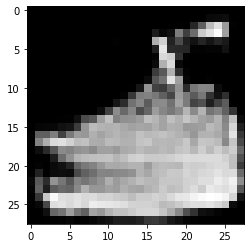

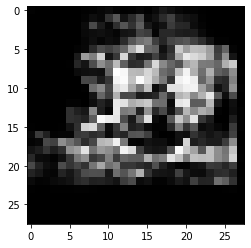

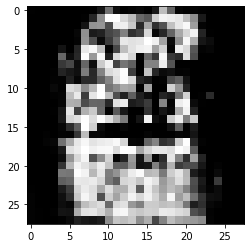

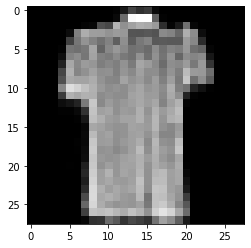

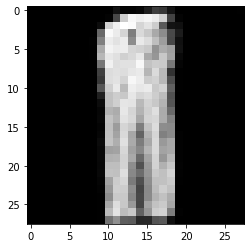

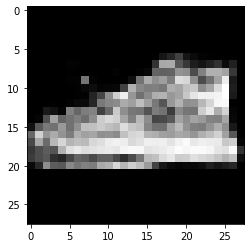

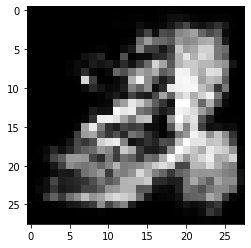

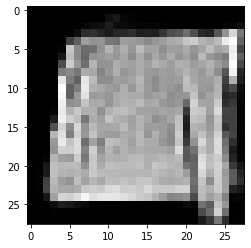

In [11]:
for _ in range(10):
  model.generate_img(cmap="gray")

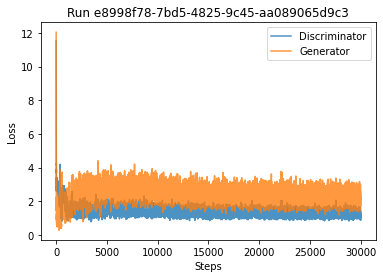

In [12]:
model.history.plot_loss()

In [8]:
model.save("fashion_mnist_gan", model_dir="fashion_mnist_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: fashion_mnist_model/combined/assets
INFO:tensorflow:Assets written to: fashion_mnist_model/generator/assets
INFO:tensorflow:Assets written to: fashion_mnist_model/discriminator/assets


In [9]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [10]:
clear_session()

In [11]:
model = gan.GAN.load("fashion_mnist_gan", model_dir="fashion_mnist_model")

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
batch_normalization (BatchNo (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 128)         819200    
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 128)         51

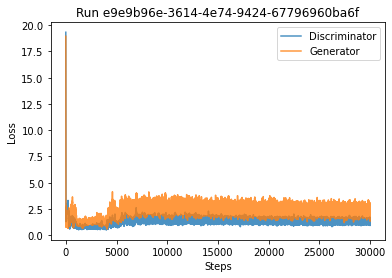

In [12]:
model.history.plot_loss()

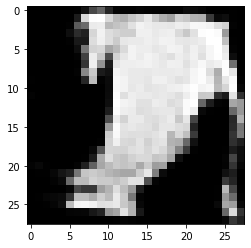

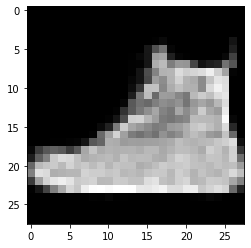

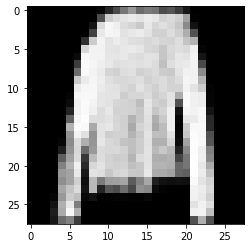

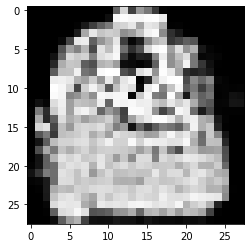

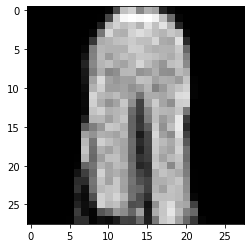

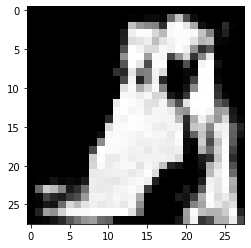

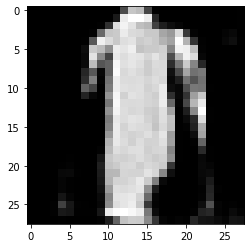

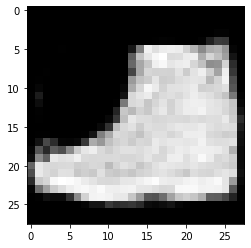

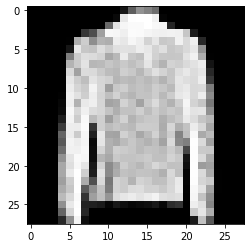

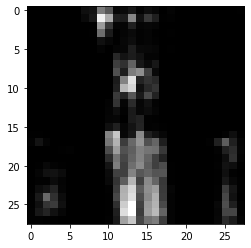

In [17]:
for _ in range(10): 
  model.generate_img(cmap="gray")

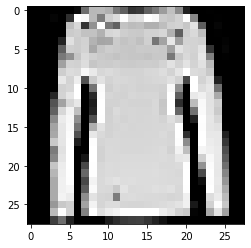

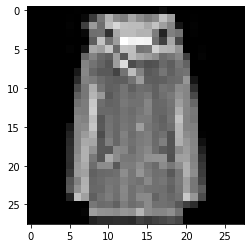

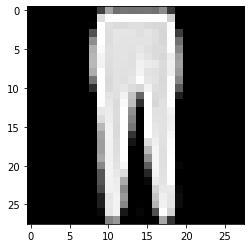

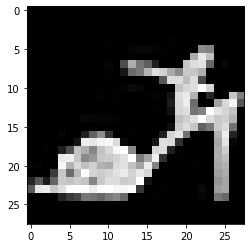

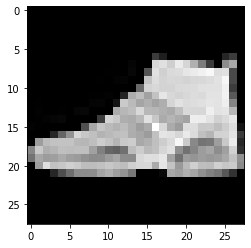

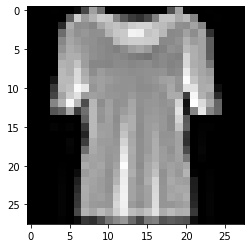

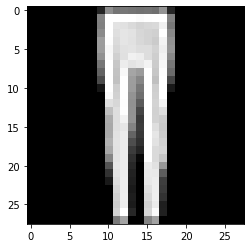

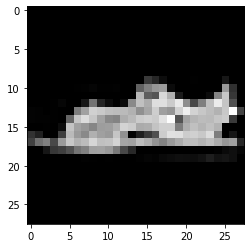

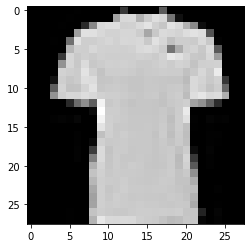

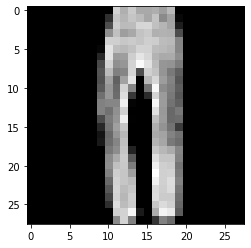

In [16]:
for _ in range(10):
  real_img = real_train[np.random.randint(real_train.shape[0])].reshape(28, 28)
  plt.imshow(real_img, cmap="gray")
  plt.show()